## GROUP PROJECT: Euklid Case

Master's Degree in Data Science and Management 

Course: Machine Learning

Students: Gian Lorenzo Marchioni () - David Paquette () - Elena Tomasella (781321)


In [1]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset
amazon_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Amazon_weekly.csv', sep = ',', header = 0)
cac_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Cac_weekly.csv', sep = ',', header = 0)
ibm_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/IBM_weekly.csv', sep = ',',header = 0)
microsoft_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Microsoft_weekly.csv', sep = ',', header = 0)
nasdaq_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Nasdaq_weekly.csv', sep = ',', header = 0)
sp500_df = pd.read_csv('/Users/elenatomasella/Documents/LUISS/machine learning/euklid/Weekly series/Sp500_weekly.csv', sep = ',', header=0)
dfs = [amazon_df, cac_df, ibm_df, microsoft_df, nasdaq_df, sp500_df]
dfs_names = ['Amazon', 'Cac', 'IBM', 'Microsoft', 'Nasdaq', 'sp500']

In [3]:
#conversion of Date values into datetime object
for df in dfs:
    df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

In [4]:
amazon_df.tail()

,Date,Open,High,Low,Close,Volume
1394,2024-02-04,159.34,172.50,154.81,171.81,334522911
1395,2024-02-11,170.20,175.00,167.65,174.45,244063321
1396,2024-02-18,174.80,175.39,165.75,169.51,248174038
1397,2024-02-25,167.83,175.75,165.74,174.99,201663539
1398,2024-03-03,175.70,176.37,174.26,174.73,44368614


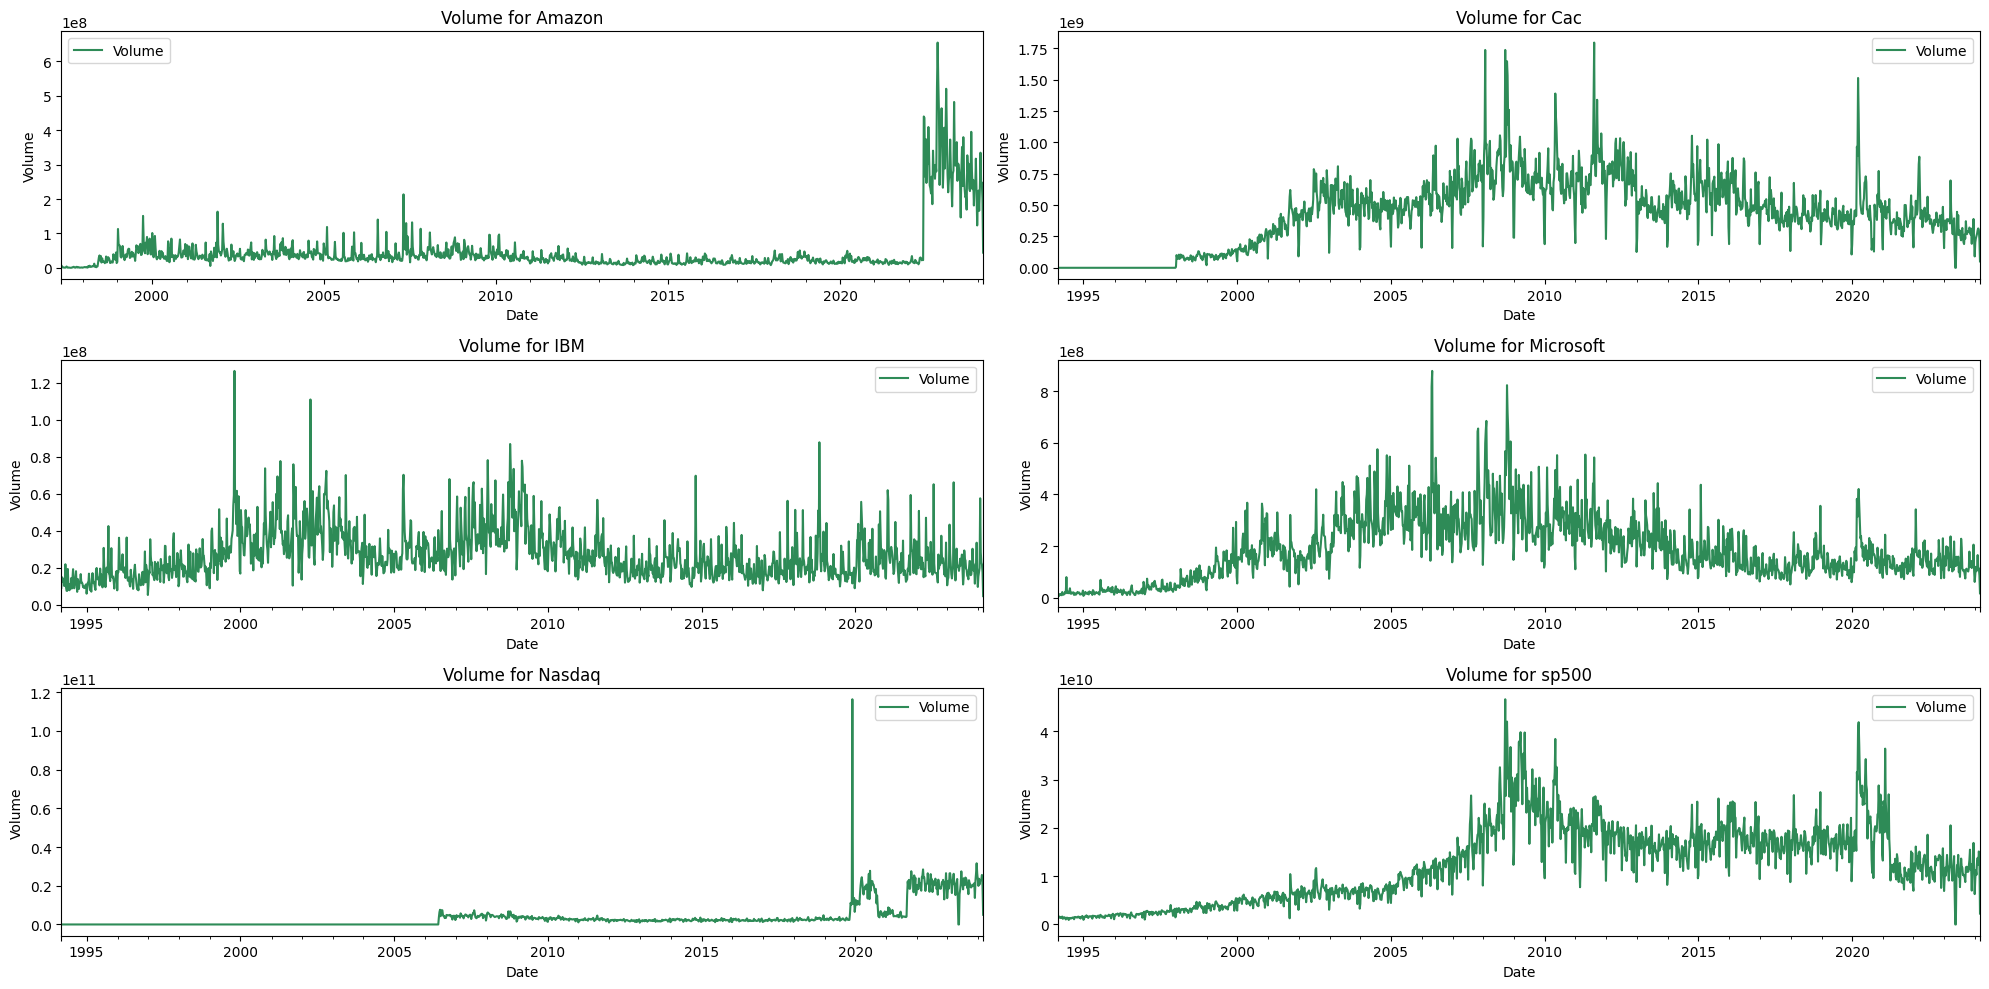

In [5]:
import matplotlib.dates as mdates
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Volume', ax=axs[i, j], color = 'seagreen')
        axs[i, j].set_title(f'Volume for {dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')
        axs[i, j].set_ylabel('Volume')

plt.tight_layout()
plt.show()

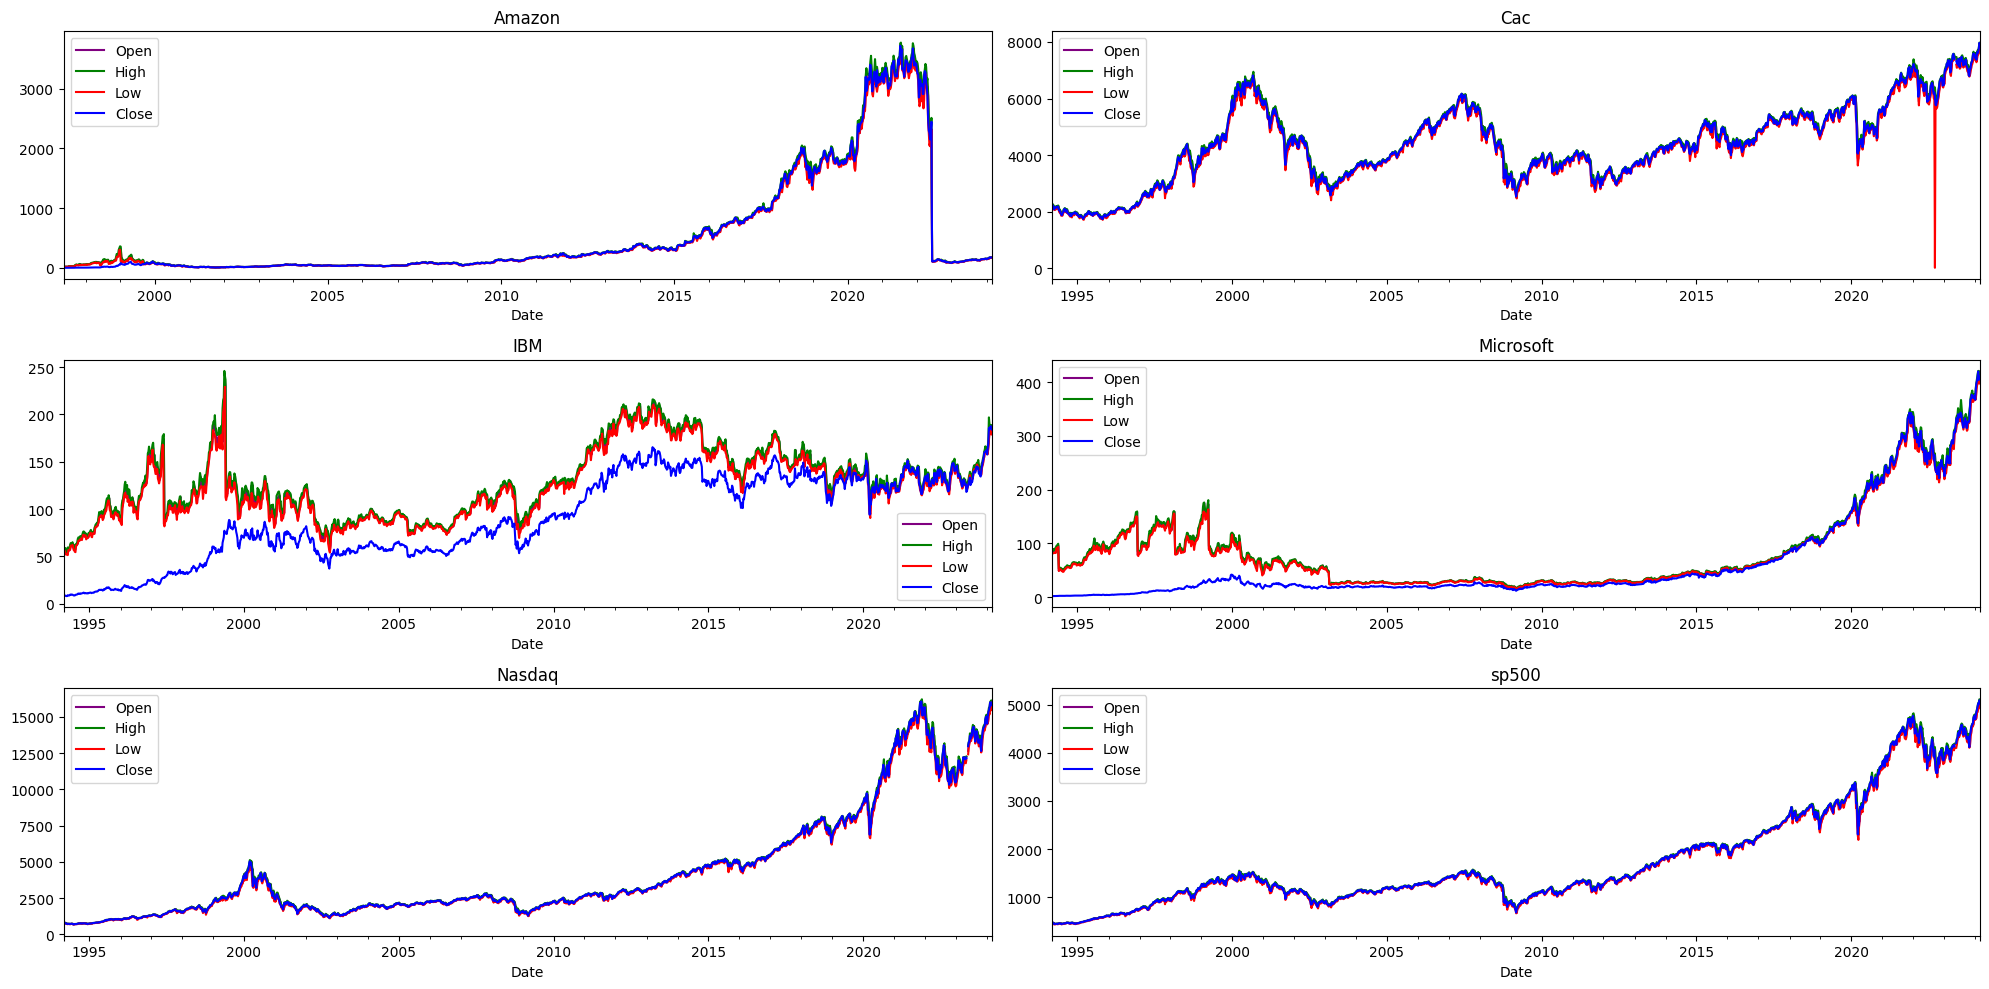

In [6]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))
for i in range(3):
    for j in range(2):
        plot_index = i * 2 + j
        dfs[plot_index].plot(x='Date', y='Open', ax=axs[i, j], color = 'purple')
        dfs[plot_index].plot(x='Date', y='High', ax=axs[i, j], color = 'green')
        dfs[plot_index].plot(x='Date', y='Low', ax=axs[i, j], color = 'red')
        dfs[plot_index].plot(x='Date', y='Close', ax=axs[i, j], color = 'blue')
        axs[i, j].set_title(f'{dfs_names[plot_index]}')
        axs[i, j].set_xlabel('Date')

plt.tight_layout()
plt.show()

In [7]:
#investigate missing values for the datasets
import missingno as msno
for name, df in zip(dfs_names, dfs):
    missing_rows = df[df.isna().any(axis=1)]
    if not missing_rows.empty:
        print(f"DataFrame: {name}")
        print(missing_rows)

for df in dfs:
    df.dropna(inplace=True) #do we have to check those dates on yahoo finance?

DataFrame: Cac
           Date  Open  High  Low  Close  Volume
1523 2023-05-14   NaN   NaN  NaN    NaN     0.0
1524 2023-05-21   NaN   NaN  NaN    NaN     0.0
DataFrame: Nasdaq
           Date  Open  High  Low  Close  Volume
1523 2023-05-14   NaN   NaN  NaN    NaN       0
1524 2023-05-21   NaN   NaN  NaN    NaN       0
DataFrame: sp500
           Date  Open  High  Low  Close  Volume
1523 2023-05-14   NaN   NaN  NaN    NaN       0
1524 2023-05-21   NaN   NaN  NaN    NaN       0


In [8]:
#summary statistics for the datasets
for name, df in zip(dfs_names, dfs):
    print(name)
    
    print(df.describe().T)

Amazon
         count                 mean                  min                  25%  \
Date      1399  2010-10-10 00:00:00  1997-05-18 00:00:00  2004-01-28 12:00:00   
Open    1399.0           554.660358                 5.91             47.28625   
High    1399.0           573.510226                 7.66               49.925   
Low     1399.0           538.014765                 5.51              44.5775   
Close   1399.0           550.467485               1.4896              41.1075   
Volume  1399.0      46996869.150822             420000.0           17453667.0   

                        50%                  75%                  max  \
Date    2010-10-10 00:00:00  2017-06-21 12:00:00  2024-03-03 00:00:00   
Open                 127.86               528.98               3744.0   
High               133.3125              543.845            3773.0781   
Low                  120.76               512.36            3570.4551   
Close                119.32               530.48            

Close<Low:
- Data recording errors: Errors might have occurred during the process of recording or entering the data, leading to inconsistencies.
- Data adjustments: Sometimes, historical data might be adjusted to account for corporate actions such as stock splits, dividends, or other factors. If not handled properly, these adjustments could lead to inconsistencies.
- Data processing issues: Errors might occur during data processing, such as merging or joining datasets, which could result in incorrect values being assigned.

In [9]:
#cases in which I have that Close<Low:
for df, name in zip(dfs, dfs_names):
    print(name, df[df['Close']<df['Low']])

Amazon           Date      Open      High      Low    Close    Volume
0   1997-05-18   18.0000   30.0000   18.000   1.7292   7238000
1   1997-05-25   21.1250   21.2500   15.750   1.5000   4836500
2   1997-06-01   18.1250   19.7500   17.500   1.5000   1611600
3   1997-06-08   18.1250   20.5000   16.500   1.6563   1527900
4   1997-06-15   19.8750   20.5000   18.375   1.5834    943700
..         ...       ...       ...      ...      ...       ...
115 1999-08-01  110.4375  115.5000   97.500  50.0313  55493000
116 1999-08-08   98.3750  102.1250   82.000  44.7813  63627000
117 1999-08-15   91.5000   97.4375   82.000  48.7188  42908500
118 1999-08-22   98.2500  117.5000   95.500  56.7188  48701800
119 1999-08-29  115.9375  135.5625  115.750  64.2500  48662200

[120 rows x 6 columns]
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM            Date     Open     High      Low     Close    Volume
0    1994-03-06   53.125   53.875   52.125    8.0537   9055900
1    

SUM UP for Close<Low: 
- Amazon: we have 120 rows between '97 and '99
- Calc: no case
- IBM: 1370 cases from 1994 to 2024
- Microsoft: 1285 cases from 1994 to 2023
- Nasdaq: no case
- sp500: no case

In [10]:
#Check for duplicates
for df, name in zip(dfs, dfs_names):
    duplicates = df[df.duplicated()]
    print(name, duplicates)

Amazon Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Cac Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
IBM Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Microsoft Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
Nasdaq Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []
sp500 Empty DataFrame
Columns: [Date, Open, High, Low, Close, Volume]
Index: []


Outliers?

## PREPROCESSING

In [11]:
# Calculate RSI (Relative Strength Index)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate MACD (Moving Average Convergence Divergence)
def calculate_macd(data, short_window=12, long_window=26):
    short_ema = data['Close'].ewm(span=short_window, min_periods=1).mean()
    long_ema = data['Close'].ewm(span=long_window, min_periods=1).mean()
    macd = short_ema - long_ema
    signal_line = macd.ewm(span=9, min_periods=1).mean()
    return macd, signal_line


In [12]:
#feature engeneering 
for df in dfs:
    # Calculate moving averages (e.g., 10-day and 50-day)
    df['MA10'] = df['Close'].rolling(window=10).mean()
    df['MA50'] = df['Close'].rolling(window=50).mean()
    df['MACD'], df['Signal_Line'] = calculate_macd(df)
    df['RSI'] = calculate_rsi(df)


In [15]:
amazon_df.tail()

,Date,Open,High,Low,Close,Volume,MA10,MA50,MACD,Signal_Line,RSI
1394,2024-02-04,159.34,172.50,154.81,171.81,334522911,153.591,128.9275,5.622299,2.443274,86.463677
1395,2024-02-11,170.20,175.00,167.65,174.45,244063321,156.333,130.5465,6.931692,3.340958,84.332503
1396,2024-02-18,174.80,175.39,165.75,169.51,248174038,158.542,132.0387,7.484503,4.169667,74.861084
1397,2024-02-25,167.83,175.75,165.74,174.99,201663539,161.044,133.7239,8.269474,4.989628,76.592328
1398,2024-03-03,175.70,176.37,174.26,174.73,44368614,163.175,135.2395,8.769500,5.745603,75.561644


In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Apply MinMax scaling to each DataFrame in dfs
for df in dfs:
    scaler = MinMaxScaler()
    df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])

# Apply Standardization to each DataFrame in dfs
for df in dfs:
    scaler = StandardScaler()
    df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])


In [22]:
amazon_df.tail()

,Date,Open,High,Low,Close,Volume,MA10,MA50,MACD,Signal_Line,RSI
1394,2024-02-04,-0.438100,-0.430672,-0.436897,-0.417445,3.979793,-0.442258,-0.496709,0.047950,0.017717,1.728535
1395,2024-02-11,-0.426065,-0.427987,-0.422258,-0.414534,2.727696,-0.439225,-0.494877,0.060765,0.026874,1.605171
1396,2024-02-18,-0.420967,-0.427568,-0.424424,-0.419980,2.784594,-0.436782,-0.493188,0.066176,0.035328,1.056913
1397,2024-02-25,-0.428691,-0.427181,-0.424435,-0.413939,2.140819,-0.434015,-0.491280,0.073858,0.043693,1.157127
1398,2024-03-03,-0.419969,-0.426516,-0.414722,-0.414226,-0.036379,-0.431658,-0.489565,0.078752,0.051404,1.097465
